<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              5718 non-null   float64
 1   Latitude (y)               5718 non-null   float64
 2   Station Name               5718 non-null   object 
 3   Date/Time                  5718 non-null   object 
 4   Year                       5718 non-null   int64  
 5   Month                      5718 non-null   int64  
 6   Day                        5718 non-null   int64  
 7   Max Temp (°C)              5567 non-null   float64
 8   Min Temp (°C)              5575 non-null   float64
 9   Mean Temp (°C)             5566 non-null   float64
 10  Heat Deg Days (°C)         5566 non-null   float64
 11  Cool Deg Days (°C)         5566 non-null   float64
 12  Total Rain (mm)            652 non-null    float64
 13  Total Snow (cm)            639 non-null    float

<ipython-input-1-32e7df11c90c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Max Temp (°C)'].fillna(data['Max Temp (°C)'].median(), inplace=True)
<ipython-input-1-32e7df11c90c>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Max Temp (°C):
   IQR: 17.799999999999997
   Lower Bound: -21.799999999999997
   Upper Bound: 49.39999999999999
   Number of Outliers: 5

Min Temp (°C):
   IQR: 14.674999999999999
   Lower Bound: -23.9875
   Upper Bound: 34.7125
   Number of Outliers: 30

Mean Temp (°C):
   IQR: 16.0
   Lower Bound: -22.5
   Upper Bound: 41.5
   Number of Outliers: 13

Heat Deg Days (°C):
   IQR: 16.0
   Lower Bound: -23.5
   Upper Bound: 40.5
   Number of Outliers: 13

Cool Deg Days (°C):
   IQR: 0.0
   Lower Bound: 0.0
   Upper Bound: 0.0
   Number of Outliers: 1332

Total Rain (mm):
   IQR: 0.0
   Lower Bound: 0.0
   Upper Bound: 0.0
   Number of Outliers: 247

Total Snow (cm):
   IQR: 0.0
   Lower Bound: 0.0
   Upper Bound: 0.0
   Number of Outliers: 24

Snow on Grnd (cm):
   IQR: 0.0
   Lower Bound: 2.0
   Upper Bound: 2.0
   Number of Outliers: 1749

Dir of Max Gust (10s deg):
   IQR: 0.0
   Lower Bound: 21.0
   Upper Bound: 21.0
   Number of Outliers: 1114

Spd of Max Gust (km/h):
   IQR: 0.0
  

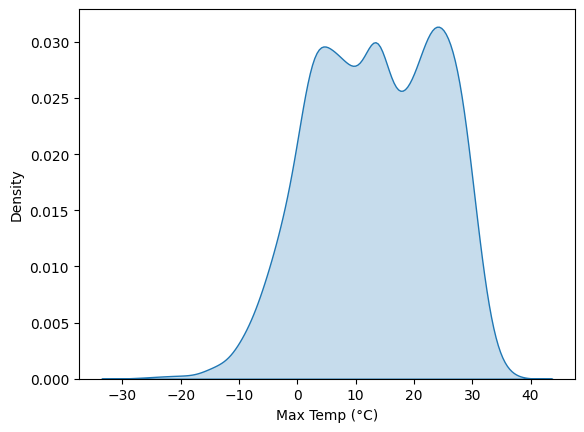

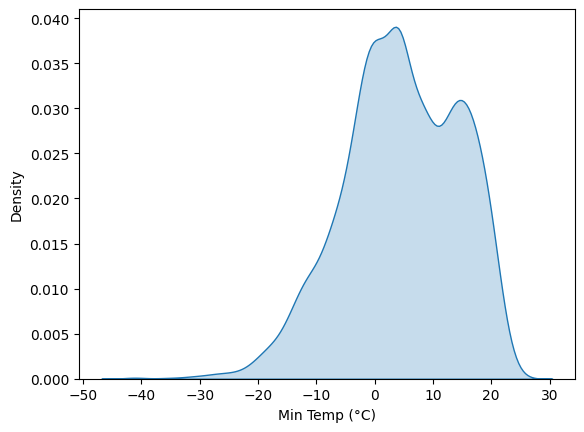

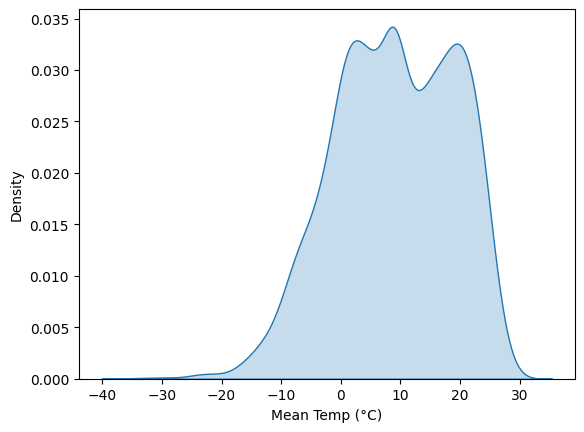

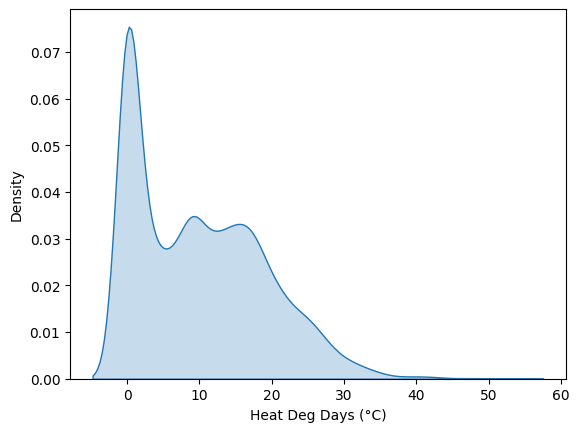

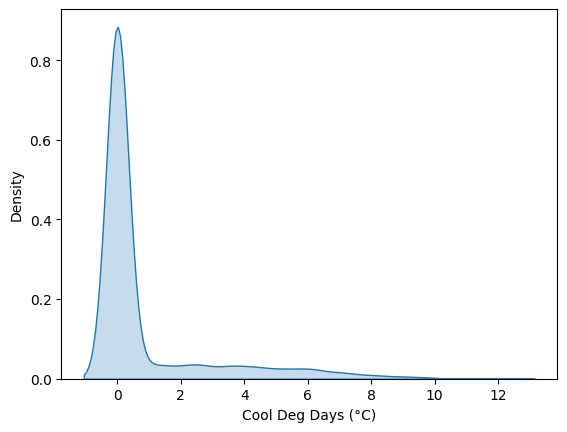

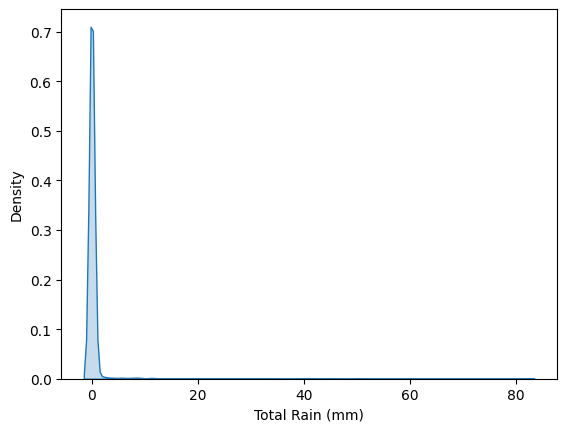

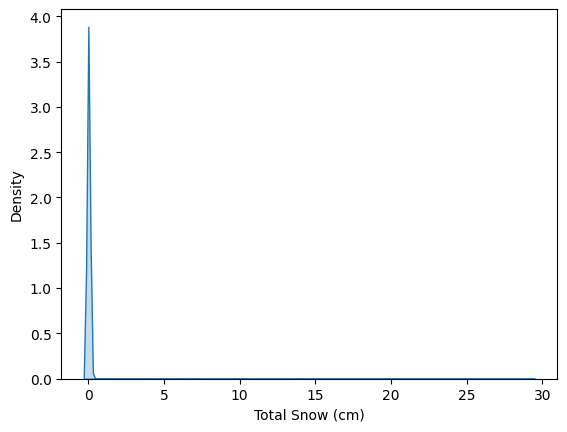

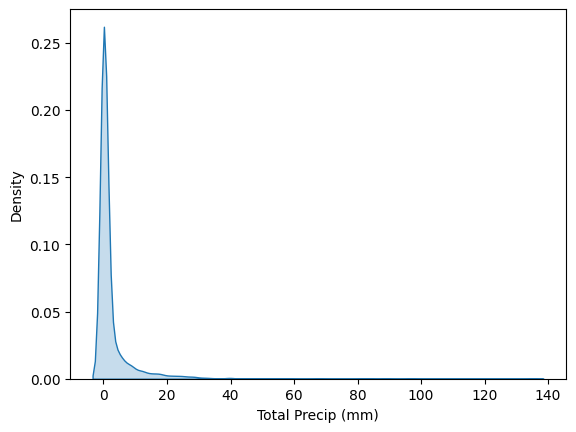

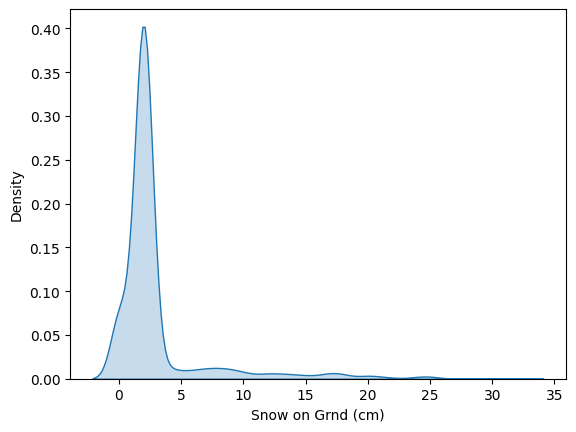

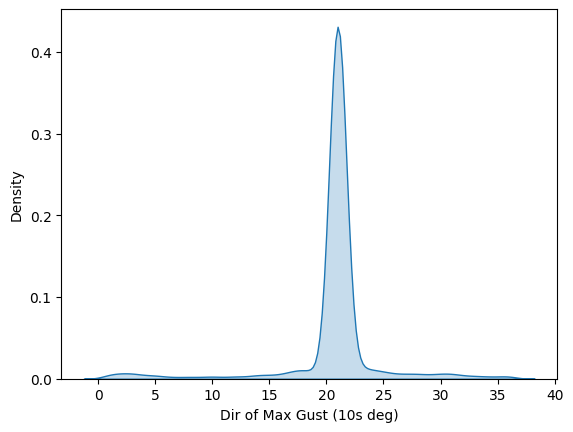

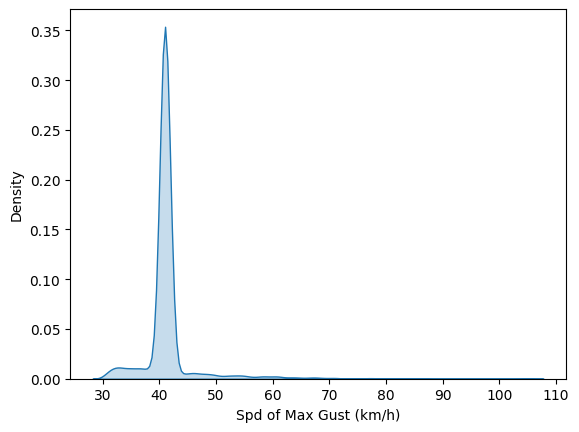

In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import calendar

data = pd.read_csv('CombinedData.csv')
data.info()
data.isnull().sum()
data['Max Temp (°C)'].fillna(data['Max Temp (°C)'].median(), inplace=True)
data['Min Temp (°C)'].fillna(data['Min Temp (°C)'].median(), inplace=True)
data['Mean Temp (°C)'].fillna(data['Mean Temp (°C)'].median(), inplace=True)
data['Heat Deg Days (°C)'].fillna(data['Heat Deg Days (°C)'].median(), inplace=True)
data['Cool Deg Days (°C)'].fillna(data['Cool Deg Days (°C)'].median(), inplace=True)
data['Total Rain (mm)'].fillna(data['Total Rain (mm)'].median(), inplace=True)
data['Total Snow (cm)'].fillna(data['Total Snow (cm)'].median(), inplace=True)
data['Total Precip (mm)'].fillna(data['Total Precip (mm)'].median(), inplace=True)
data['Snow on Grnd (cm)'].fillna(data['Snow on Grnd (cm)'].median(), inplace=True)
data['Dir of Max Gust (10s deg)'].fillna(data['Dir of Max Gust (10s deg)'].median(), inplace=True)
data['Spd of Max Gust (km/h)'].fillna(data['Spd of Max Gust (km/h)'].median(), inplace=True)

plt.figure()
sns.kdeplot(data['Max Temp (°C)'], fill=True)
plt.figure()
sns.kdeplot(data['Min Temp (°C)'], fill=True)
plt.figure()
sns.kdeplot(data['Mean Temp (°C)'], fill=True)
plt.figure()
sns.kdeplot(data['Heat Deg Days (°C)'], fill=True)
plt.figure()
sns.kdeplot(data['Cool Deg Days (°C)'], fill=True)
plt.figure()
sns.kdeplot(data['Total Rain (mm)'], fill=True)
plt.figure()
sns.kdeplot(data['Total Snow (cm)'], fill=True)
plt.figure()
sns.kdeplot(data['Total Precip (mm)'], fill=True)
plt.figure()
sns.kdeplot(data['Snow on Grnd (cm)'], fill=True)
plt.figure()
sns.kdeplot(data['Dir of Max Gust (10s deg)'], fill=True)
plt.figure()
sns.kdeplot(data['Spd of Max Gust (km/h)'], fill=True)

# IQR Method

def find_outliers_IQR(data):
   outliers_dict = {}

   for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        IQR = q3 - q1

        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_dict[column] = outliers

        print(f"{column}:")
        print(f"   IQR: {IQR}")
        print(f"   Lower Bound: {lower_bound}")
        print(f"   Upper Bound: {upper_bound}")
        print(f"   Number of Outliers: {len(outliers)}\n")

   return outliers_dict

columns = [
    "Max Temp (°C)", "Min Temp (°C)", "Mean Temp (°C)",
    "Heat Deg Days (°C)", "Cool Deg Days (°C)", "Total Rain (mm)",
    "Total Snow (cm)", "Snow on Grnd (cm)", "Dir of Max Gust (10s deg)",
    "Spd of Max Gust (km/h)"
]
outliers = find_outliers_IQR(data[columns])